# Nondeterministic Finite Automata

After completing this chapter, you will be able to:

* Define a nondeterministic finite automaton (NFA).
* Explain the difference between a deterministic finite automaton (DFA) and an NFA.
* Represent an NFA with a state diagram.
* Define a language with an NFA.
* Understand the equivalence of DFAs and NFAs.

In [1]:
from graphviz import Digraph, Source

In [2]:
import shutil

# Check if 'dot' executable is on PATH
dot_path = shutil.which("dot")
if dot_path:
    print(f"Graphviz is installed at: {dot_path}")
else:
    print("Graphviz is not found on PATH.")

import os
print(os.environ['PATH'])

Graphviz is installed at: C:\Program Files\Graphviz\bin\dot.EXE
D:\Python313\Scripts\;D:\Python313\;C:\Program Files\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Git\cmd;C:\Program Files\Java\apache-maven-3.9.11\bin;C:\Program Files\Docker\Docker\resources\bin;C:\Program Files\nodejs\;C:\ProgramData\chocolatey\bin;C:\Program Files\nodejs;C:\Program Files\Graphviz\bin;C:\Users\yongz\AppData\Local\Programs\Python\Launcher\;C:\Users\yongz\AppData\Local\Microsoft\WindowsApps;C:\Users\yongz\AppData\Local\GitHubDesktop\bin;C:\Users\yongz\AppData\Roaming\npm


## 1. The Idea of Nondeterminism

For the finite automata we've seen so far, if you're at any state in the automaton then every letter in the input alphabet $\Sigma$ has a single corresponding transition. This means that at any state there is one and only one place to go for a given input, and consequently for any sequence of inputs there's only one corresponding path in the finite automaton. There are no options, and there is no ambiguity. This is why we called them *deterministic* finite automaton - for any input string, the path and final destination in the finite automaton is *uniquely determined*.

We're now going to modify this, and introduce an element of choice. This means that for any given input string, there might be multiple corresponding paths through the finite automaton, depending on the choices that are made. We will call these finite automata *nondeterministic finute automata*, and they are the focus of this section.

As an example, take a look at the state diagram below.

In [3]:
NFA_example = Digraph()
NFA_example.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
NFA_example.node('', shape='none')
NFA_example.edge('', 'q0')

# States
NFA_example.node('q0', shape='circle') # Initial state
NFA_example.node('q1', shape='circle')
NFA_example.node('q2', shape='circle')
NFA_example.node('q3', shape='doublecircle') # Accept state

# Transitions
NFA_example.edge('q0', 'q0', label='b')
NFA_example.edge('q0', 'q1', label='a,b')
NFA_example.edge('q1', 'q2', label='b')
NFA_example.edge('q2', 'q0', label='a')
NFA_example.edge('q2', 'q3', label='<&lambda;>')
NFA_example.edge('q3', 'q3', label='a,b')

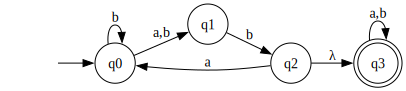

In [4]:
Source(NFA_example.source)

Notice a few things we haven't seen before:

* At our initial state $q_{0}$, there are *two* transitions corresponding with the input $b$.
* At the state $q_{1}$ there is no transition for the input $a$.
* At the state $q_{2}$ there is a transition for the empty input $\lambda$.

What do these changes mean? They mean:

* At state $q_{0}$, if the input is a $b$, then there are two possible transitions for this input (either stay at $q_{0}$ or move to $q_{1}$), and a choice must be made as to which path to follow.
* At state $q_{1}$ if the input is an $a$ then there is no path to follow, and in this situation our path terminates or "crashes".
* At state $q_{2}$ a choice can be made to transition to $q_{3}$ without even reading an input. However, this choice isn't forced, and staying at $q_{2}$ is also an option.

These changes mean that for a given sequence of input characters there might be multiple possibilities for the state of the NFA, or there might be none. For example:

* The input sequence $aba$ has two possible states final states, $q_{0}$ or $q_{3}$, depending on whether the $\lambda$-transition is made at $q_{2}$.

* The input sequence $aab$ has no possible final state, because after reading the first $a$ the automaton must transition from $q_{0}$ to $q_{1}$, and then after reading the second $a$ there is no corresponding transition and the path terminates.

* The input sequence $abb$ has only one possible final state, corresponding to transitioning from $q_{0}$ to $q_{1}$ after the $a$ is read, transitioning from $q_{1}$ to $q_{2}$ after the first $b$ is read, transitioning from $q_{2}$ to $q_{3}$ with the $\lambda$-transition, and then transitioning from $q_{3}$ to $q_{3}$ (staying put) when the final $b$ is read. If the transition from $q_{2}$ to $q_{3}$ with the $\lambda$-transition is not chosen, then the second $b$ has no corresponding transition and the path terminates.

We say that an NFA accepts a given input string if *any* of the possible final states are accepting states. So, it would accept both $aba$ and $abb$, even though one of the possible final states for the sequence $aba$ isn't an accepting state.

## 2. DFAs vs. NFAs

The table below summarizes the important differences between DFAs and NFAs.

| DFAs | NFAs |
| --- | --- |
| One unique starting state. | At least one starting state, but possibly more. |
| Every state has exactly one transition for every character in the input alphabet ($\Sigma$). | States can have multiple transition for a character in $\Sigma$, or none at all. |
| At any step in the reading of the input string, the DFA is in one unique state. | At any step in the reading of the input string, the NFA can be in multiple states, or none at all. |
| A DFA accepts an input string if after reading the string it's in an accepting state. | A NFA accepts an input string if after reading the string it could possibly be in an accepting state. |

The NFA is much more flexible than the DFA, and you might think this would mean there are languages that can be recognized by a NFA that cannot be recognized by a DFA. However, we'll see this is not the case.

## 3. Formal Definition of a NFA

Formally, a nondeterministic finite automaton is a 5-tuple $(Q,\Sigma,\delta,S,F)$ where:

1.   $Q$ is a *finite* set of states,
2.   $\Sigma$ is a finite alphabet,
3.   $\delta : Q \times \Sigma_{\lambda} \rightarrow P(Q)$ is the transition function,
4.   $S \subseteq Q$ is the (non-empty) subset of start states, and
5.   $F \subseteq Q$ is the set of accepting states.

Here $\Sigma_{\lambda}$ means the finite alphabet $\Sigma$ plus the empty string, represented by the symbol $\lambda$. So, if $\Sigma = \{a,b\}$, then $\Sigma_{\lambda} = \{a,b,\lambda\}$. The term $P(Q)$ is the *powerset* of $Q$, and represents the set of all possible subsets of $Q$. We need the powerset because a given state and input combination can have more than one resulting state. For example, in the NFA from Section 1.4.1 above, the transition function for $q_{0}$ and the input $b$ would be $\delta(q_{0},b) \rightarrow \{q_{0},q_{1}\}$, because in $q_{0}$ with the input $b$ the NFA can either stay at $q_{0}$ or transition to $q_{1}$.

## 4. Representing Nondeterministic Finite Automata in Python

We're going to modify the DFA class we created in Section 1.3. First, we'll define how the class is constructed, provide a validation method to ensure the arguments (the 5-tuple) properly define a NFA, and provide methods for constructing and displaying the NFA's state diagram. These are all similar to the DFA class.

In [5]:
class NFA:
    def __init__(self, states, alphabet, transition_function, start_states, accept_states):
        self.states = set(states)
        self.alphabet = set(alphabet)
        self.transition_function = transition_function
        self.start_states = set(start_states) # Modified to use a set
        self.accept_states = set(accept_states)

        self._validate()

    def _validate(self):
        if not self.start_states.issubset(self.states):
            raise ValueError("Start states must be a subset of states.")
        if not self.accept_states.issubset(self.states):
            raise ValueError("Accept states must be a subset of states.")

        # Ensure all transitions are to valid states and symbols
        for (state, symbol), next_state in self.transition_function.items():
            if state not in self.states:
                raise ValueError(f"Invalid transition: ({state}, {symbol}) - source state not in states.")
            if symbol not in self.alphabet and symbol != '<&lambda;>': # Allow lambda transitions
                raise ValueError(f"Symbol '{symbol}' not in alphabet.")
            # Check if the destination is a set of states and if all states in the set are valid
            if not isinstance(next_state, set) or not next_state.issubset(self.states):
                 raise ValueError(f"Invalid transition: ({state}, {symbol}) → {next_state} - destination is not a set of states or contains invalid states.")


    def _build_graph(self):
        dot = Digraph()
        dot.attr(rankdir='LR')
        dot.node('', shape='none')
        # Handle multiple start states
        for start_state in self.start_states:
          dot.edge('', start_state)

        for state in self.states:
          shape = 'doublecircle' if state in self.accept_states else 'circle'
          dot.node(state, shape=shape)

        # Handle transitions to sets of states
        for (src, symbol), dst_set in self.transition_function.items():
            for dst in dst_set:
                dot.edge(src, dst, label=symbol)

        return dot

    def show(self):
        dot = self._build_graph()
        display(Source(dot.source))

We can use this to display the state diagram for the example DFA from Section 1.4.1:

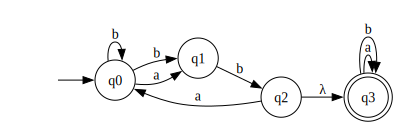

In [6]:
NFA_example_1_4_1 = NFA(
    states={'q0', 'q1', 'q2', 'q3'},
    alphabet={'a', 'b'},
    transition_function={
        ('q0', 'b'): {'q0', 'q1'},
        ('q0', 'a'): {'q1'},
        ('q1', 'b'): {'q2'},
        ('q2', 'a'): {'q0'},
        ('q2', '<&lambda;>'): {'q3'},
        ('q3', 'a'): {'q3'},
        ('q3', 'b'): {'q3'},
    },
    start_states={'q0'},
    accept_states={'q3'}
)

NFA_example_1_4_1.show()

As with the DFA, we can construct a method for tracing the sequence of states of the automaton as it processes an input string. However, unlike with the DFA, for an NFA this won't be a sequence of states but a sequence of sets of states.

First, we'll want to create a function that takes a set of states and a transition function, and determines all the states that can be reached from this set just through $\lambda$-transitions.

In [7]:
# Function for finding all the states that can be reached from a set of states through lambda-transitions
def lambda_closure(states, transition_function):
  lambda_states = states.copy()
  for state in states:
    if (state, '<&lambda;>') in transition_function:
      lambda_states.update(transition_function[(state, '<&lambda;>')])
  if lambda_states != states:
    lambda_states.update(lambda_closure(lambda_states, transition_function)) #Note the use of recursion
  return lambda_states

Now, we'll create a method for tracing through the sequence of states of an NFA as it processes an input string.

In [8]:
# Method for tracing through the sequence of states of the nondeterministic finite automaton as it processes an input string.
def trace(self, input_string):
  current_states = lambda_closure(self.start_states, self.transition_function)
  trace = [current_states]
  for symbol in input_string:
    next_states = set()
    for state in current_states:
      if (state, symbol) in self.transition_function:
        next_states.update(self.transition_function[(state, symbol)])
    current_states = lambda_closure(next_states, self.transition_function)
    trace.append(current_states)
  return trace

NFA.trace = trace

Let's check how this method handles the three example inputs from the end of Section 1.4.1:

In [9]:
NFA_example_1_4_1.trace('aba')

[{'q0'}, {'q1'}, {'q2', 'q3'}, {'q0', 'q3'}]

In [10]:
NFA_example_1_4_1.trace('aab')

[{'q0'}, {'q1'}, set(), set()]

*NOTE* - Here *set()* means the empty set $\emptyset$.

In [11]:
NFA_example_1_4_1.trace('abb')

[{'q0'}, {'q1'}, {'q2', 'q3'}, {'q3'}]

Finally, we can use this *trace* method to construct a method that determines whether an NFA accepts a given input string.

In [12]:
def accepts(self, input_string):
  trace = self.trace(input_string)
  return any(state in self.accept_states for state in trace[-1])

NFA.accepts = accepts

Checking this on the NFA from Section 1.4.1 and the three example inputs:

In [13]:
NFA_example_1_4_1.accepts('aba')

True

In [14]:
NFA_example_1_4_1.accepts('aab')

False

In [15]:
NFA_example_1_4_1.accepts('abb')

True

As in Chapter 1.3, the best practice here would be to include all this within the definition of the NFA class, and we provide code for doing this as an appendix to chapter.

## 5. Equivalence of NFAs and DFAs

We say that an NFA and a DFA are *equivalent* if they recognize the same language.

DFAs are a special case of NFAs, and so any DFA is also an NFA. This means that, obviously, for any DFA there is an equivalent NFA (the DFA itself).

It's a bit surprising that the other direction is also true. Namely, for any NFA, there is an equivalent DFA.

While proving this isn't particularly difficult, it will be the most in-depth proof we've seen so far. So, before we present the general proof, we'll illustrate the idea with an example.

### 5.1 Constructing an Equivalent DFA from an NFA

Suppose you have the NFA below.

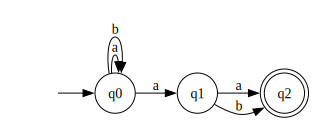

In [16]:
NFA_a_2nd_to_last = NFA(
    states={'q0', 'q1', 'q2'},
    alphabet={'a', 'b'},
    transition_function={
        ('q0', 'a'): {'q0', 'q1'},
        ('q0', 'b'): {'q0'},
        ('q1', 'a'): {'q2'},
        ('q1', 'b'): {'q2'},
    },
    start_states={'q0'},
    accept_states={'q2'}
)

NFA_a_2nd_to_last.show()

This NFA recognizes the language of all strings over the alphabet $\Sigma = \{a,b\}$ for which $a$ is the next-to-last letter.

If we gave this NFA the input string $aba$ then, depending on the choices made, there are two possible states, $q_{0}$ or $q_{1}$, the NFA could be in.

In [17]:
NFA_a_2nd_to_last.trace('aba')

[{'q0'}, {'q0', 'q1'}, {'q0', 'q2'}, {'q0', 'q1'}]

If we gave this NFA the input string $aab$ then, again depending on the choices made, there are two possible states, $q_{0}$ or $q_{2}$, the NFA could be in.

In [18]:
NFA_a_2nd_to_last.trace('aab')

[{'q0'}, {'q0', 'q1'}, {'q0', 'q1', 'q2'}, {'q0', 'q2'}]

As neither $q_{0}$ not $q_{1}$ are accepting states, the string $aba$ would not be accepted by the NFA.

In [19]:
NFA_a_2nd_to_last.accepts('aba')

False

Because $q_{2}$ is an accepting state the string $aab$ would be.

In [20]:
NFA_a_2nd_to_last.accepts('aab')

True

We'd like to find a DFA that accepts the same language as this NFA, and to do so the basic idea is the states of this DFA represent all the different possible subsets of states from the NFA. There are three states in this NFA, and so its set of states is $Q = \{q_{0}, q_{1}, q_{2}\}$. The possible subsets of $Q$, its *powerset*, is $P(Q) = \{\emptyset, \{q_{0}\}, \{q_{1}\}, \{q_{2}\}, \{q_{0}, q_{1}\}, \{q_{0}, q_{2}\}, \{q_{1}, q_{2}\}, \{q_{0}, q_{1}, q_{2}\}\}$. Each of these subsets is a state within our DFA, which we represent below.

In [21]:
DFA_states = Digraph()
DFA_states.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
DFA_states.node('<&empty;>', shape='circle')
DFA_states.node('{q0}', shape='circle')
DFA_states.node('{q1}', shape='circle')
DFA_states.node('{q2}', shape='circle')
DFA_states.node('{q0,q1}', shape='circle')
DFA_states.node('{q0,q2}', shape='circle')
DFA_states.node('{q1,q2}', shape='circle')
DFA_states.node('{q0,q1,q2}', shape='circle')

In [22]:
Source(DFA_states.source)

Now, suppose we're in the state $\{q_{0},q_{1}\}$ and we read the input $b$. What is the corresponding transition? Well, it's the possible states we could transition to in the NFA from either of those states. In the NFA if we're in state $q_{0}$ and we read a $b$, then we must stay at $q_{0}$. If we're in state $q_{1}$ and we read a $b$ then we must transition to $q_{2}$. So, in the DFA if we're in state $\{q_{0},q_{1}\}$ and we read a $b$ we transition to the state $\{q_{0},q_{2}\}$. What if we're in state $\{q_{0},q_{1}\}$ and we read the input $a$? Well, in the NFA if we're in state $q_{0}$ and we read an $a$, then we either stay at $q_{0}$ or transition to $q_{1}$. In the NFA if we're in state $q_{1}$ and we read an $a$, then we transition to $q_{2}$. So, in the DFA if we're in state $\{q_{0},q_{1}\}$ and we read an $a$ we transition to the state $\{q_{0},q_{1},q_{2}\}$. The transitions for all the states and possible inputs are represented below.

In [23]:
DFA_states_and_edges = Digraph()
DFA_states_and_edges.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
DFA_states_and_edges.node('<&empty;>', shape='circle')
DFA_states_and_edges.node('{q0}', shape='circle')
DFA_states_and_edges.node('{q1}', shape='circle')
DFA_states_and_edges.node('{q2}', shape='circle')
DFA_states_and_edges.node('{q0,q1}', shape='circle')
DFA_states_and_edges.node('{q0,q2}', shape='circle')
DFA_states_and_edges.node('{q1,q2}', shape='circle')
DFA_states_and_edges.node('{q0,q1,q2}', shape='circle')

# Transitions
DFA_states_and_edges.edge('<&empty;>', '<&empty;>', label='a')
DFA_states_and_edges.edge('<&empty;>', '<&empty;>', label='b')
DFA_states_and_edges.edge('{q0}', '{q0,q1}', label='a')
DFA_states_and_edges.edge('{q0}', '{q0}', label='b')
DFA_states_and_edges.edge('{q1}', '{q2}', label='a')
DFA_states_and_edges.edge('{q1}', '{q2}', label='b')
DFA_states_and_edges.edge('{q2}', '<&empty;>', label='a')
DFA_states_and_edges.edge('{q2}', '<&empty;>', label='b')
DFA_states_and_edges.edge('{q0,q1}', '{q0,q1,q2}', label='a')
DFA_states_and_edges.edge('{q0,q1}', '{q0,q2}', label='b')
DFA_states_and_edges.edge('{q0,q2}', '{q0,q1}', label='a')
DFA_states_and_edges.edge('{q0,q2}', '{q0}', label='b')
DFA_states_and_edges.edge('{q1,q2}', '{q2}', label='a')
DFA_states_and_edges.edge('{q1,q2}', '{q2}', label='b')
DFA_states_and_edges.edge('{q0,q1,q2}', '{q0,q1,q2}', label='a')
DFA_states_and_edges.edge('{q0,q1,q2}', '{q0,q2}', label='b')

In [24]:
Source(DFA_states_and_edges.source)

Now, what are the initial and final states of the DFA? Well, the initial state of the DFA is the one corresponding with the initial states of the NFA. In this case that's $\{q_{0}\}$. The final states are those that contain at least one final state of the NFA. As the only final state in the NFA is $q_{2}$, the accepting states of the DFA are $\{q_{2}\}, \{q_{0}, q_{2}\}, \{q_{1}, q_{2}\}$, and $\{q_{0}, q_{1}, q_{2}\}$. These are indicated in the state diagram below.

In [25]:
DFA_full = Digraph()
DFA_full.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
DFA_full.node('', shape='none')
DFA_full.edge('', '{q0}')

# States
DFA_full.node('<&empty;>', shape='circle')
DFA_full.node('{q0}', shape='circle')
DFA_full.node('{q1}', shape='circle')
DFA_full.node('{q2}', shape='doublecircle')
DFA_full.node('{q0,q1}', shape='circle')
DFA_full.node('{q0,q2}', shape='doublecircle')
DFA_full.node('{q1,q2}', shape='doublecircle')
DFA_full.node('{q0,q1,q2}', shape='doublecircle')

# Transitions
DFA_full.edge('<&empty;>', '<&empty;>', label='a')
DFA_full.edge('<&empty;>', '<&empty;>', label='b')
DFA_full.edge('{q0}', '{q0,q1}', label='a')
DFA_full.edge('{q0}', '{q0}', label='b')
DFA_full.edge('{q1}', '{q2}', label='a')
DFA_full.edge('{q1}', '{q2}', label='b')
DFA_full.edge('{q2}', '<&empty;>', label='a')
DFA_full.edge('{q2}', '<&empty;>', label='b')
DFA_full.edge('{q0,q1}', '{q0,q1,q2}', label='a')
DFA_full.edge('{q0,q1}', '{q0,q2}', label='b')
DFA_full.edge('{q0,q2}', '{q0,q1}', label='a')
DFA_full.edge('{q0,q2}', '{q0}', label='b')
DFA_full.edge('{q1,q2}', '{q2}', label='a')
DFA_full.edge('{q1,q2}', '{q2}', label='b')
DFA_full.edge('{q0,q1,q2}', '{q0,q1,q2}', label='a')
DFA_full.edge('{q0,q1,q2}', '{q0,q2}', label='b')

In [26]:
Source(DFA_full.source)

At this point we could be done. However, we can note that there are some states and transitions that cannot possibly be reached from the starting state, and so will never actually be involved in the operation of the DFA. Removing them gives us the DFA below.

In [27]:
DFA_reduced = Digraph()
DFA_reduced.attr(rankdir='LR')  # Diagram direction: left to right

# Start arrow
DFA_reduced.node('', shape='none')
DFA_reduced.edge('', '{q0}')

# Reachable States
DFA_reduced.node('{q0}', shape='circle')
DFA_reduced.node('{q0,q1}', shape='circle')
DFA_reduced.node('{q0,q2}', shape='doublecircle')
DFA_reduced.node('{q0,q1,q2}', shape='doublecircle')

# Reachable Transitions
DFA_reduced.edge('{q0}', '{q0,q1}', label='a')
DFA_reduced.edge('{q0}', '{q0}', label='b')
DFA_reduced.edge('{q0,q1}', '{q0,q1,q2}', label='a')
DFA_reduced.edge('{q0,q1}', '{q0,q2}', label='b')
DFA_reduced.edge('{q0,q1,q2}', '{q0,q1,q2}', label='a')
DFA_reduced.edge('{q0,q1,q2}', '{q0,q2}', label='b')
DFA_reduced.edge('{q0,q2}', '{q0,q1}', label='a')
DFA_reduced.edge('{q0,q2}', '{q0}', label='b')

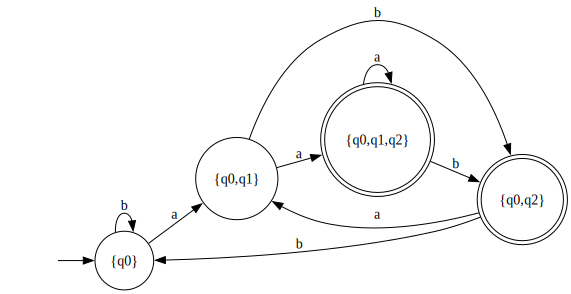

In [28]:
Source(DFA_reduced.source)

This DFA recognizes the same language (all strings with $a$ as the next-to-last letter) as the NFA above, and so they are equivalent.

### 5.2 Proof of the Equivalence of NFAs and DFAs

As mentioned above, DFAs are special cases of NFAs, so for any DFA there's obviously an equivalent NFA - the DFA itself.

Going the other way we'll want to formalize and generalize the construction we used above. This could be viewed as the first "real" proof of this class. Please don't be intimidated by it. There's nothing here that's more conceptually difficult than what we did in the example above - it just uses more general language.

**PROOF**

Let $N = (Q,\Sigma, \delta, S, F)$ be a NFA recognizing some language $A$. We construct a DFA $M = (Q', \Sigma, \delta', q_{0}', F')$ also recognizing $A$. Before going through the full construction, we'll first consider the easier case where $N$ has no $\lambda$-transitions.



1.   $Q' = P(Q)$. Every state of $M$ is a set of states of $N$. Recall that $P(Q)$ is the set of subsets of $Q$, knows as the *powerset* of $Q$.

2.   For $R \in Q'$ and $a \in \Sigma$, let $\delta'(R,a) = \{q \in Q | q \in \delta(r,a)$ for some $r \in R\}$. If $R$ is a state of $M$ it is also a set of states of $N$. When $M$ reads a symbol $a$ in state $R$, it shows where $a$ takes each state in $R$. Because each state may go to a set of states, we take the union of all these sets. A compact way of writing this is

  $$\delta'(R,a) = \bigcup_{r \in R} \delta(r,a)$$

3.   $q_{0}' = S$. $M$ starts in the state corresponding to the start states of $N$.

4.   $F' = \{R \in Q | R$ contains an accept state of $N\}$. The machine $M$ accepts if one of the possible states that $N$ could be in at this point is an accept state.

For any NFA without $\lambda$-transitions (like the example from Subsection 1.4.5.1 above) the construction above will produce an equivalent DFA. For the case where an NFA has $\lambda$-transitions, we need to set up an extra bit of notation. For any state $R$ of $M$, we define $E(R)$ to be the collection of states that can be reached from members of $R$ by going only along $\lambda$ arrows, inculding the members of $R$ themselves. Formally, for $R \subseteq Q$ let

$$\displaystyle E(R) = \{q | q$ can be reached from $R$ by traveling along $0$ or more $\lambda$ arrows$\}$$

This operation is the *lambda_closure* function we defined in Section 1.4.4 above.

We then modify the transition functions of $M$ to be

$$\delta'(R,a) = \{q \in Q | q \in E(\delta(r,a))$  for some $r \in R\}$$

Finally, we modify the start state of $M$ to be all possible states that can be reached from the start states of $N$ along the $\lambda$-transitions. So, we change $q_{0}'$ to be $E(S)$.

With this modification, we have completed the construction of the DFA $M$ that simulates the NFA $N$, and is equivalent to it in that it recognizes the same language over $\Sigma$.

## 6. Practice Exercises

**NOTE** - For each of these exercises the alpbabet is $\Sigma = \{a,b\}$.

**Exercise 1**: Construct an NFA with only three states that recognizes the language of all strings that end with the substring $aa$.

**Exercise 2**: Create the NFA from Exercise 1 in Python as an NFA class, display it, and then verify it accepts the string $baa$ but not $aba$.

**Exercise 3**: Construct a DFA equivalent to the NFA above using the method from Section 1.4.5.

**Exercise 4** (Major Challenge): Write a Python function that accepts an NFA class (described in this chapter), and outputs an equivalent DFA class (defined in the previous chapter.

## 7. Further Reading

* [Introduction to Computer Theory](https://www.amazon.com/Introduction-Computer-Theory-Daniel-Cohen/dp/0471137723) (Second Edition) by Daniel I.A. Cohen

  *Chapter 6 - Transition Graphs*, *Chapter 7 - Kleene's Theorem*

* [Automata Theory, Languages, and Computation](https://www.amazon.com/Introduction-Automata-Theory-Languages-Computation/dp/0321462254) (Third Edition) by Hopcroft, Motwani, and Ullman

  *Section 2.3 - Nondeterministic Finite Automata*

* [Introduction to the Theory of Computation](https://www.cengage.com/c/introduction-to-the-theory-of-computation-3e-sipser/9781133187790/) (Third Edition) by Michael Sipser
  
  *Section 1.2 - Nondeterminism*

## 8. Appendix: NFA Class with All Methods

In [29]:
'''
class NFA:
    def __init__(self, states, alphabet, transition_function, start_states, accept_states):
        self.states = set(states)
        self.alphabet = set(alphabet)
        self.transition_function = transition_function
        self.start_states = set(start_states) # Modified to use a set
        self.accept_states = set(accept_states)

        self._validate()

    def _validate(self):
        if not self.start_states.issubset(self.states):
            raise ValueError("Start states must be a subset of states.")
        if not self.accept_states.issubset(self.states):
            raise ValueError("Accept states must be a subset of states.")

        # Ensure all transitions are to valid states and symbols
        for (state, symbol), next_state in self.transition_function.items():
            if state not in self.states:
                raise ValueError(f"Invalid transition: ({state}, {symbol}) - source state not in states.")
            if symbol not in self.alphabet and symbol != '<&lambda;>': # Allow lambda transitions
                raise ValueError(f"Symbol '{symbol}' not in alphabet.")
            # Check if the destination is a set of states and if all states in the set are valid
            if not isinstance(next_state, set) or not next_state.issubset(self.states):
                 raise ValueError(f"Invalid transition: ({state}, {symbol}) → {next_state} - destination is not a set of states or contains invalid states.")


    def _build_graph(self):
        dot = Digraph()
        dot.attr(rankdir='LR')
        dot.node('', shape='none')
        # Handle multiple start states
        for start_state in self.start_states:
          dot.edge('', start_state)

        for state in self.states:
          shape = 'doublecircle' if state in self.accept_states else 'circle'
          dot.node(state, shape=shape)

        # Handle transitions to sets of states
        for (src, symbol), dst_set in self.transition_function.items():
            for dst in dst_set:
                dot.edge(src, dst, label=symbol)

        return dot

    def show(self):
        dot = self._build_graph()
        display(Source(dot.source))

    def _lambda_closure(states, transition_function):
      lambda_states = states.copy()
      for state in states:
        if (state, '<&lambda;>') in transition_function:
          lambda_states.update(transition_function[(state, '<&lambda;>')])
      if lambda_states != states:
        lambda_states.update(lambda_closure(lambda_states, transition_function)) #Note the use of recursion
      return lambda_states

    def trace(self, input_string):
      current_states = lambda_closure(self.start_states, self.transition_function)
      trace = [current_states]
      for symbol in input_string:
        next_states = set()
        for state in current_states:
          if (state, symbol) in self.transition_function:
            next_states.update(self.transition_function[(state, symbol)])
        current_states = lambda_closure(next_states, self.transition_function)
        trace.append(current_states)
      return trace

    def accepts(self, input_string):
      trace = self.trace(input_string)
      return any(state in self.accept_states for state in trace[-1])
''';